In [15]:
import pandas as pd
from datetime import datetime
df = pd.read_excel("main_data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
# Extract month, day, and hour information
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
# Initialize a new column for the rate
df['Rate'] = 0

# June to September, 6 AM to 6 PM
condition1 = (df['Month'].between(6, 9)) & (df['Hour'].between(6, 18))
df.loc[condition1, 'Rate'] = 0.12

# June to September, 6 PM to 6 AM
condition2 = (df['Month'].between(6, 9)) & (~df['Hour'].between(6, 18))
df.loc[condition2, 'Rate'] = 0.05

# October to May, 6 AM to 6 PM
condition3 = (~df['Month'].between(6, 9)) & (df['Hour'].between(6, 18))
df.loc[condition3, 'Rate'] = 0.05

# October to May, 6 PM to 6 AM
condition4 = (~df['Month'].between(6, 9)) & (~df['Hour'].between(6, 18))
df.loc[condition4, 'Rate'] = 0.04


#[remove the row if the column EL_Solar_BusBarn_Total_KW has this value "[-11059] No Good Data For Calculation"
# Assuming you want to filter based on 'EL_Solar_BusBarn_Total_KW' column
df = df[df['EL_Solar_CarCharging_total_KW'] != '[-11059] No Good Data For Calculation']

# EL_Solar_BusBarn_Total_KW convert to float
df['EL_Solar_CarCharging_total_KW'] = df['EL_Solar_CarCharging_total_KW'].astype(float)
# if EL_Solar_BusBarn_Total_KW is greater than 38, then replace it with 0
df.loc[df['EL_Solar_CarCharging_total_KW'] > 38, 'EL_Solar_CarCharging_total_KW'] = 0
# Calculate cost saved
df['Cost_Saved'] = df['EL_Solar_CarCharging_total_KW'] * df['Rate']

# Save the dataframe to a new csv file
df.to_csv("savings.csv", index=False)

In [16]:
total_cost_saved_10_63_years = df['Cost_Saved'].sum()
total_cost_saved_10_63_yearsannual_savings = total_cost_saved_10_63_years / 10.63
initial_cost_cam1 = 890479.6 - 300000
annual_savings = total_cost_saved_10_63_years / 10.63
payback_period_cam = initial_cost_cam / annual_savings
life_expectancy = 20  # in years
total_profit_cam = (annual_savings * life_expectancy) - initial_cost_cam
print("Total profit in 20 years: $", total_profit_cam)

Total profit in 20 years: $ -423249.35602550785


In [17]:
import pandas as pd
from matplotlib import pyplot as plt

# Assuming df is your DataFrame and Cost_Saved is your column with annual savings
df['Year'] = pd.to_datetime(df['Date']).dt.year  # Make sure you have a Year column
annual_savings1 = df.groupby('Year')['Cost_Saved'].sum()  # Sum the annual savings

initial_cost_cam1 = 890479.6 - 300000 # Initial cost for CAMBUS Array

cumulative_savings = annual_savings1.cumsum()  # Cumulative sum of annual savings
break_even_year = None

# Find the year where the cumulative savings surpass the initial investment
cumulative_sum = 0
years = 0

# Calculate average annual savings
average_savings1 = annual_savings1.mean()

# Initialize variables
cumulative_savings = 0
break_even_year = None
current_year = 2011  # Start year

print(f"Initial Cost: {initial_cost_cam}")
print(f"Average Savings: {average_savings1}")

# Loop to find break-even year
for year in range(current_year, current_year + 1000):  # Loop up to 100 years into the future
    cumulative_savings += average_savings1

    if cumulative_savings >= initial_cost_cam:
        break_even_year1 = year
        break

print(f"The EVC will break even in the projected year {break_even_year1}")




Initial Cost: 509531.0
Average Savings: 4168.972161131145
The EVC will break even in the projected year 2133


### Array

In [18]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("Raw_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
# Extract month, day, and hour information
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
# Initialize a new column for the rate
df['Rate'] = 0

# June to September, 6 AM to 6 PM
condition1 = (df['Month'].between(6, 9)) & (df['Hour'].between(6, 18))
df.loc[condition1, 'Rate'] = 0.12

# June to September, 6 PM to 6 AM
condition2 = (df['Month'].between(6, 9)) & (~df['Hour'].between(6, 18))
df.loc[condition2, 'Rate'] = 0.05

# October to May, 6 AM to 6 PM
condition3 = (~df['Month'].between(6, 9)) & (df['Hour'].between(6, 18))
df.loc[condition3, 'Rate'] = 0.05

# October to May, 6 PM to 6 AM
condition4 = (~df['Month'].between(6, 9)) & (~df['Hour'].between(6, 18))
df.loc[condition4, 'Rate'] = 0.04


#[remove the row if the column EL_Solar_BusBarn_Total_KW has this value "[-11059] No Good Data For Calculation"
# Assuming you want to filter based on 'EL_Solar_BusBarn_Total_KW' column
df = df[df['EL_Solar_BusBarn_Total_KW'] != '[-11059] No Good Data For Calculation']

# EL_Solar_BusBarn_Total_KW convert to float
df['EL_Solar_BusBarn_Total_KW'] = df['EL_Solar_BusBarn_Total_KW'].astype(float)
# if EL_Solar_BusBarn_Total_KW is greater than 38, then replace it with 0
df.loc[df['EL_Solar_BusBarn_Total_KW'] > 38, 'EL_Solar_BusBarn_Total_KW'] = 0
# Calculate cost saved
df['Cost_Saved'] = df['EL_Solar_BusBarn_Total_KW'] * df['Rate']

# Save the dataframe to a new csv file
df.to_csv("savings_array.csv", index=False)

/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_24544/3513409071.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Raw_Data.csv")
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_24544/3513409071.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
total_cost_saved_10_63_years = df['Cost_Saved'].sum()
total_cost_saved_10_63_yearsannual_savings = total_cost_saved_10_63_years / 10.63
initial_cost_cam = 509531.0
annual_savings = total_cost_saved_10_63_years / 10.63
payback_period_cam = initial_cost_cam / annual_savings
life_expectancy = 20  # in years
total_profit_cam = (annual_savings * life_expectancy) - initial_cost_cam
print("Total profit in 20 years: $", total_profit_cam)

Total profit in 20 years: $ -438330.9129717857


In [20]:
import pandas as pd
from matplotlib import pyplot as plt

# Assuming df is your DataFrame and Cost_Saved is your column with annual savings
df['Year'] = pd.to_datetime(df['Date']).dt.year  # Make sure you have a Year column
annual_savings = df.groupby('Year')['Cost_Saved'].sum()  # Sum the annual savings

initial_cost_cam = 509531.0  # Initial cost for CAMBUS Array

cumulative_savings = annual_savings.cumsum()  # Cumulative sum of annual savings
break_even_year = None

# Find the year where the cumulative savings surpass the initial investment
cumulative_sum = 0
years = 0

# Calculate average annual savings
average_savings = annual_savings.mean()

# Calculate average annual savings
average_savings = annual_savings.mean()

# Initialize variables
cumulative_savings = 0
break_even_year = None
current_year = 2011  # Start year

print(f"Initial Cost: {initial_cost_cam}")
print(f"Average Savings: {average_savings}")

# Loop to find break-even year
for year in range(current_year, current_year + 200):  # Loop up to 100 years into the future
    cumulative_savings += average_savings

    if cumulative_savings >= initial_cost_cam:
        break_even_year = year
        break

print(f"The EVC will break even in the projected year {break_even_year}")




Initial Cost: 509531.0
Average Savings: 3440.258750499627
The EVC will break even in the projected year 2159


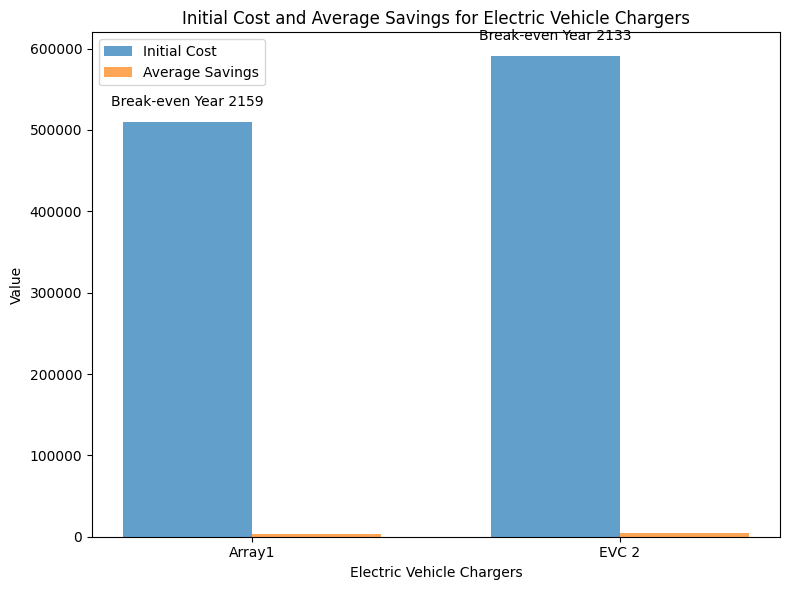

In [21]:
import matplotlib.pyplot as plt

# Data
initial_costs = [initial_cost_cam,initial_cost_cam1]
average_savings = [average_savings, average_savings1]
break_even_years = [break_even_year, break_even_year1]

# Labels for bars
labels = ['Array1', 'EVC 2']

# Create a vertical bar graph
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(labels))

# Plot Initial Cost
plt.bar(index, initial_costs, bar_width, label='Initial Cost', alpha=0.7)

# Plot Average Savings
plt.bar([i + bar_width for i in index], average_savings, bar_width, label='Average Savings', alpha=0.7)

# Add projected break-even years as text labels above the bars
for i in index:
    plt.text(i, initial_costs[i] + 20000, f'Break-even Year {break_even_years[i]}', ha='center')

# Set labels and title
plt.xlabel('Electric Vehicle Chargers')
plt.ylabel('Value')
plt.title('Initial Cost and Average Savings for Electric Vehicle Chargers')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


In [1]:
# 0.30 for each kwh